In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ANZ synthesised transaction dataset.csv')

In [3]:
df.head()

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

        long_lat txn_description                           merchant_id  \
0  153.41 -27.95             POS  81c48296-73be-44a7-befa-d053f48ce7cd   
1  153.41 -27.95       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e   
2  151.23 -33.94             POS  835c231d-8cdf-4e96-859d-e9d571760cf0   
3  153.10 -27.66       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673   
4  153.41 -27.95       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0   

   merchant_code first_name  ...  age merchant_suburb merchant_state  \
0            NaN      Diana  ...   26         Ashmore            QLD   
1            NaN      Diana  ...   26          Sydney            NSW   
2            NaN    Michael  ...   38          Sydney            NSW   
3            NaN     Rhonda  ...   40         Buderim            QLD   
4            NaN      Diana  ...   26   Mermaid Beach            QLD   

                     extraction amount                    transaction_id  \
0  2018-08-01T01:01:15.000+0000  16.25  a623070bfead4541a6b0fff8a09e706c   
1  2018-08-01T01:13:45.000+0000  14.19  13270a2a902145da9db4c951e04b51b9   
2  2018-08-01T01:26:15.000+0000   6.42  feb79e7ecd7048a5a36ec889d1a94270   
3  2018-08-01T01:38:45.000+0000  40.90  2698170da3704fd981b15e64a006079e   
4  2018-08-01T01:51:15.000+0000   3.25  329adf79878c4cf0aeb4188b4691c266   

     country     customer_id merchant_long_lat movement  
0  Australia  CUS-2487424745     153.38 -27.99    debit  
1  Australia  CUS-2487424745     151.21 -33.87    debit  
2  Australia  CUS-2142601169     151.21 -33.87    debit  
3  Australia  CUS-1614226872     153.05 -26.68    debit  
4  Australia  CUS-2487424745     153.44 -28.06    debit  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null object
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 non-null 

In [5]:
df.describe().transpose()

count          mean           std    min       25%  \
card_present_flag   7717.0      0.802644      0.398029   0.00     1.000   
merchant_code        883.0      0.000000      0.000000   0.00     0.000   
balance            12043.0  14704.195553  31503.722652   0.24  3158.585   
age                12043.0     30.582330     10.046343  18.00    22.000   
amount             12043.0    187.933588    592.599934   0.10    16.000   

                       50%        75%        max  
card_present_flag     1.00      1.000       1.00  
merchant_code         0.00      0.000       0.00  
balance            6432.01  12465.945  267128.52  
age                  28.00     38.000      78.00  
amount               29.00     53.655    8835.98

In [6]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
def convert (dateStr):
    dateStr = dateStr.split('/')
    month = dateStr[0]
    return month
df['month'] = df['date'].apply(convert)

We can remove the cells having maximum number of Null values.

In [8]:
df = df.drop(['date', 'merchant_suburb', 'merchant_code', 'transaction_id'],axis = 1)

In [9]:
long_lat = df['long_lat'].str.split("-", n = 1, expand = True)
df['long'] = long_lat[0]
df['lat'] = long_lat[1]
df = df.drop(['long_lat'], axis = 1)

In [10]:
df.head()

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

  txn_description                           merchant_id first_name  balance  \
0             POS  81c48296-73be-44a7-befa-d053f48ce7cd      Diana    35.39   
1       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e      Diana    21.20   
2             POS  835c231d-8cdf-4e96-859d-e9d571760cf0    Michael     5.71   
3       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673     Rhonda  2117.22   
4       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0      Diana    17.95   

  gender  ...  merchant_state                    extraction amount    country  \
0      F  ...             QLD  2018-08-01T01:01:15.000+0000  16.25  Australia   
1      F  ...             NSW  2018-08-01T01:13:45.000+0000  14.19  Australia   
2      M  ...             NSW  2018-08-01T01:26:15.000+0000   6.42  Australia   
3      F  ...             QLD  2018-08-01T01:38:45.000+0000  40.90  Australia   
4      F  ...             QLD  2018-08-01T01:51:15.000+0000   3.25  Australia   

      customer_id merchant_long_lat movement month     long    lat  
0  CUS-2487424745     153.38 -27.99    debit     8  153.41   27.95  
1  CUS-2487424745     151.21 -33.87    debit     8  153.41   27.95  
2  CUS-2142601169     151.21 -33.87    debit     8  151.23   33.94  
3  CUS-1614226872     153.05 -26.68    debit     8  153.10   27.66  
4  CUS-2487424745     153.44 -28.06    debit     8  153.41   27.95  

[5 rows x 21 columns]

<Figure size 504x432 with 0 Axes>

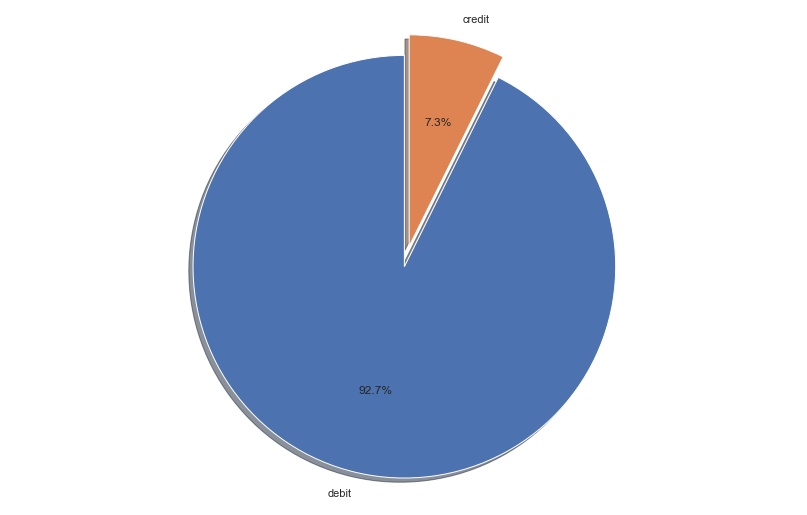

In [76]:
plt.figure(figsize = (7,6))
labels = 'debit', 'credit'
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(df['movement'].value_counts(), labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Figure size 504x288 with 0 Axes>

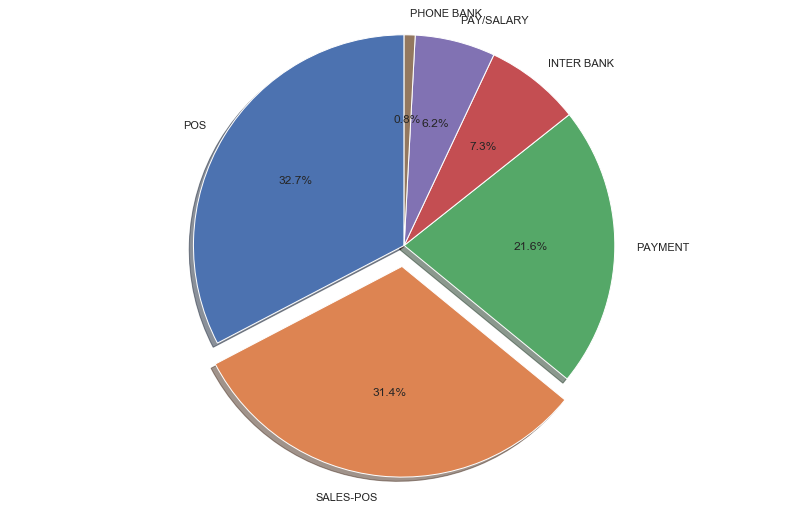

In [61]:
plt.figure(figsize = (7,4))
labels = 'POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY','PHONE BANK'
explode = (0, 0.1, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(df['txn_description'].value_counts(), labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [70]:
df['month'].unique()

array(['8', '9', '10'], dtype=object)

<Figure size 504x288 with 0 Axes>

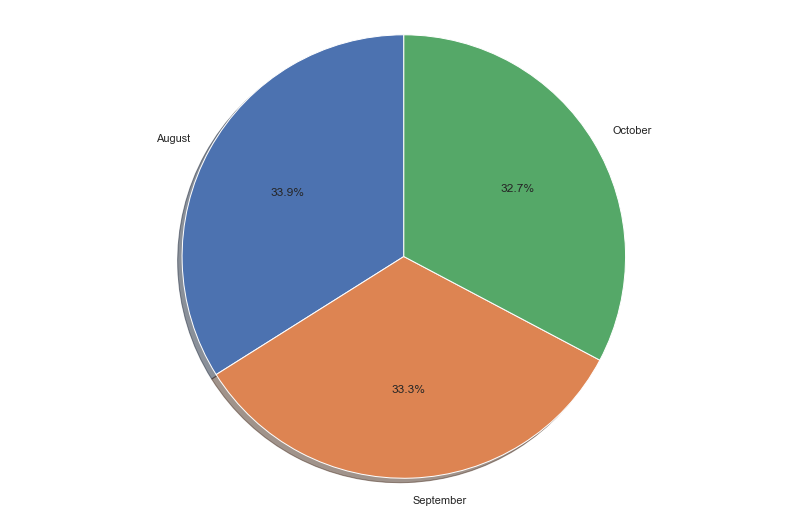

In [74]:
plt.figure(figsize = (7,4))
labels = 'August', 'September', 'October'
fig1, ax1 = plt.subplots()
ax1.pie(df['month'].value_counts(), labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Figure size 504x288 with 0 Axes>

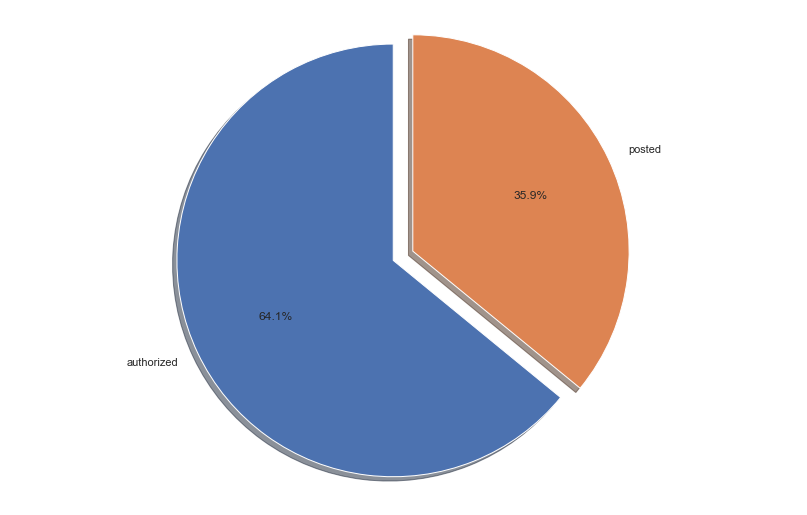

In [77]:
plt.figure(figsize = (7,4))
labels = 'authorized', 'posted'
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(df['status'].value_counts(), labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [13]:
authorized_trncs = df[df['status'] == 'authorized']

In [14]:
authorized_trncs = authorized_trncs.drop(['merchant_state','country','merchant_long_lat','merchant_id', 'extraction','bpay_biller_code','card_present_flag', 'currency'], axis = 1)

In [15]:
authorized_trncs.head()

status         account txn_description first_name  balance gender  age  \
0  authorized  ACC-1598451071             POS      Diana    35.39      F   26   
1  authorized  ACC-1598451071       SALES-POS      Diana    21.20      F   26   
2  authorized  ACC-1222300524             POS    Michael     5.71      M   38   
3  authorized  ACC-1037050564       SALES-POS     Rhonda  2117.22      F   40   
4  authorized  ACC-1598451071       SALES-POS      Diana    17.95      F   26   

   amount     customer_id movement month     long    lat  
0   16.25  CUS-2487424745    debit     8  153.41   27.95  
1   14.19  CUS-2487424745    debit     8  153.41   27.95  
2    6.42  CUS-2142601169    debit     8  151.23   33.94  
3   40.90  CUS-1614226872    debit     8  153.10   27.66  
4    3.25  CUS-2487424745    debit     8  153.41   27.95

In [16]:
authorized_trncs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 13 columns):
status             7717 non-null object
account            7717 non-null object
txn_description    7717 non-null object
first_name         7717 non-null object
balance            7717 non-null float64
gender             7717 non-null object
age                7717 non-null int64
amount             7717 non-null float64
customer_id        7717 non-null object
movement           7717 non-null object
month              7717 non-null object
long               7717 non-null object
lat                7717 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 844.0+ KB


In [17]:
authorized_trncs = authorized_trncs.reset_index(drop=True)

In [18]:
# change gender to dummy variable
authorized_trncs = pd.get_dummies(authorized_trncs, columns = ['gender'], drop_first = True)

(-4.302956947726633, 90.3025388916038, -4.208195249162886, 88.20703659692842)

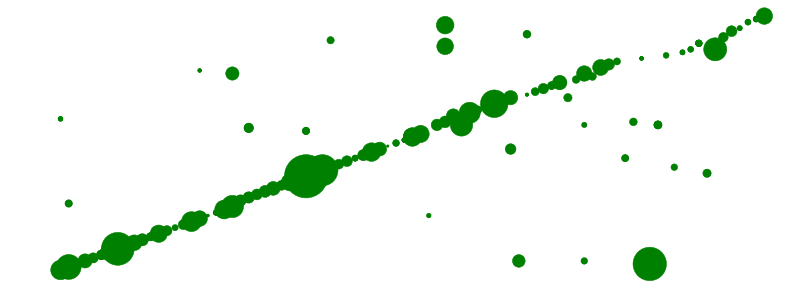

In [19]:
plt.figure(figsize = (27,10), dpi = 37)
plt.scatter(x = 'long', y = 'lat', data = authorized_trncs, s = 'amount', c = 'g')
plt.autoscale(False)
plt.axis('off')

In [20]:
authorized_trncs['txn_description'].unique()

array(['POS', 'SALES-POS'], dtype=object)

In [21]:
authorized_trncs = pd.get_dummies(authorized_trncs, columns = ['txn_description'], drop_first = True)

In [22]:
authorized_trncs.head()

status         account first_name  balance  age  amount  \
0  authorized  ACC-1598451071      Diana    35.39   26   16.25   
1  authorized  ACC-1598451071      Diana    21.20   26   14.19   
2  authorized  ACC-1222300524    Michael     5.71   38    6.42   
3  authorized  ACC-1037050564     Rhonda  2117.22   40   40.90   
4  authorized  ACC-1598451071      Diana    17.95   26    3.25   

      customer_id movement month     long    lat  gender_M  \
0  CUS-2487424745    debit     8  153.41   27.95         0   
1  CUS-2487424745    debit     8  153.41   27.95         0   
2  CUS-2142601169    debit     8  151.23   33.94         1   
3  CUS-1614226872    debit     8  153.10   27.66         0   
4  CUS-2487424745    debit     8  153.41   27.95         0   

   txn_description_SALES-POS  
0                          0  
1                          1  
2                          0  
3                          1  
4                          1

In [23]:
customer_df = authorized_trncs.drop(['movement', 'status'],axis = 1)

In [24]:
customer_df.head()

account first_name  balance  age  amount     customer_id month  \
0  ACC-1598451071      Diana    35.39   26   16.25  CUS-2487424745     8   
1  ACC-1598451071      Diana    21.20   26   14.19  CUS-2487424745     8   
2  ACC-1222300524    Michael     5.71   38    6.42  CUS-2142601169     8   
3  ACC-1037050564     Rhonda  2117.22   40   40.90  CUS-1614226872     8   
4  ACC-1598451071      Diana    17.95   26    3.25  CUS-2487424745     8   

      long    lat  gender_M  txn_description_SALES-POS  
0  153.41   27.95         0                          0  
1  153.41   27.95         0                          1  
2  151.23   33.94         1                          0  
3  153.10   27.66         0                          1  
4  153.41   27.95         0                          1

Text(0, 0.5, 'Amount Spent')

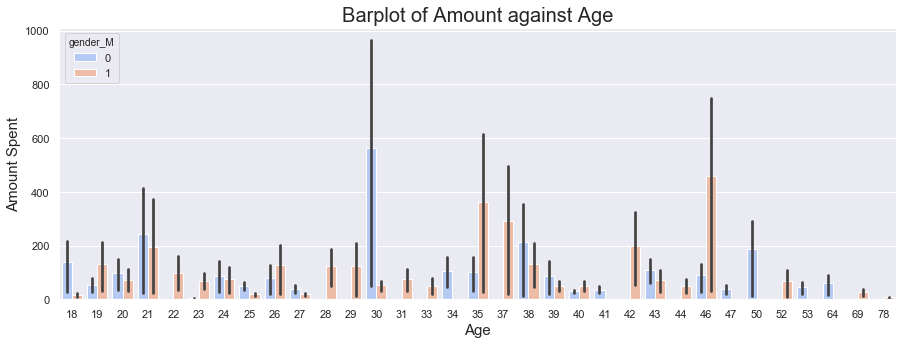

In [25]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
age_amount_with_gender_graph = sns.barplot(x='age', y='amount',hue = 'gender_M', data=customer_df, palette='coolwarm', estimator = np.std)
age_amount_with_gender_graph.axes.set_title("Barplot of Amount against Age",fontsize=20)
age_amount_with_gender_graph.set_xlabel("Age", fontsize=15)
age_amount_with_gender_graph.set_ylabel("Amount Spent", fontsize=15)

Text(0, 0.5, 'Count')

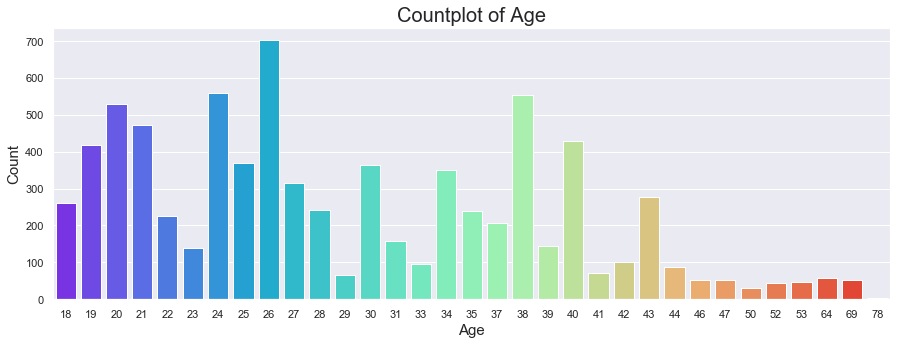

In [26]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
age_countplot = sns.countplot(x = 'age', data = customer_df, palette= 'rainbow')
age_countplot.axes.set_title("Countplot of Age",fontsize=20)
age_countplot.set_xlabel("Age", fontsize=15)
age_countplot.set_ylabel("Count", fontsize=15)

Text(0, 0.5, 'Amount Spent')

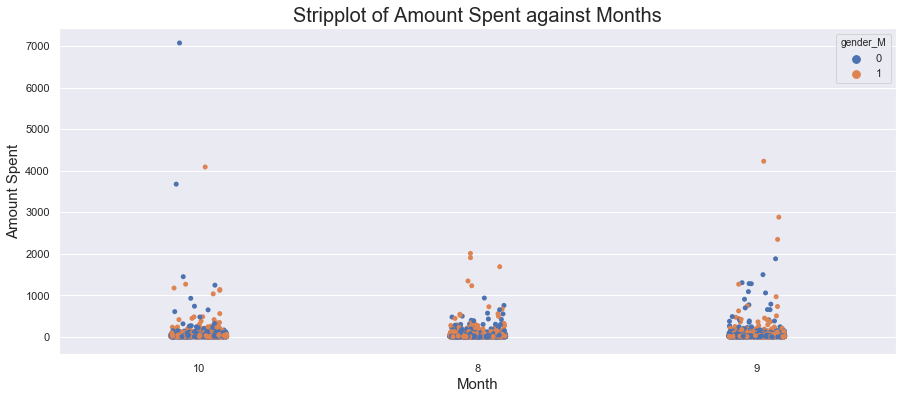

In [27]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
month_amount_with_gender_graph = sns.stripplot(x = 'month', y = 'amount', data = customer_df, hue = 'gender_M', jitter = True)
month_amount_with_gender_graph.axes.set_title("Stripplot of Amount Spent against Months",fontsize=20)
month_amount_with_gender_graph.set_xlabel("Month", fontsize=15)
month_amount_with_gender_graph.set_ylabel("Amount Spent", fontsize=15)

In [28]:
customer_df.corr()

balance       age    amount  gender_M  \
balance                    1.000000  0.149160  0.030800  0.056767   
age                        0.149160  1.000000  0.026577 -0.007601   
amount                     0.030800  0.026577  1.000000  0.007138   
gender_M                   0.056767 -0.007601  0.007138  1.000000   
txn_description_SALES-POS  0.000003 -0.003349 -0.001660  0.014404   

                           txn_description_SALES-POS  
balance                                     0.000003  
age                                        -0.003349  
amount                                     -0.001660  
gender_M                                    0.014404  
txn_description_SALES-POS                   1.000000

Balance and Age are  pretty well correlated.

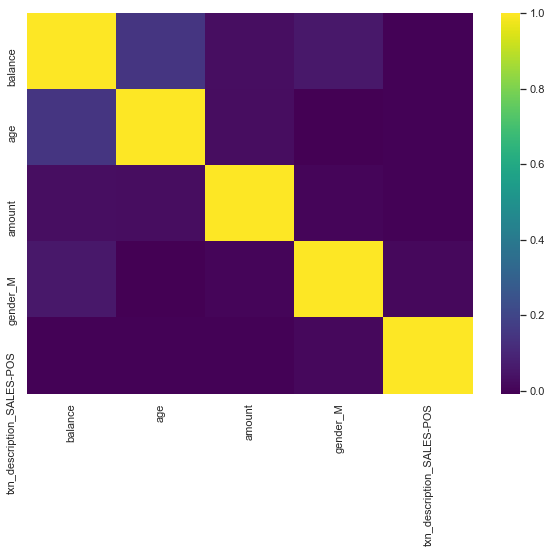

In [29]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(customer_df.corr(), cmap = 'viridis')

Text(0, 0.5, 'Balance')

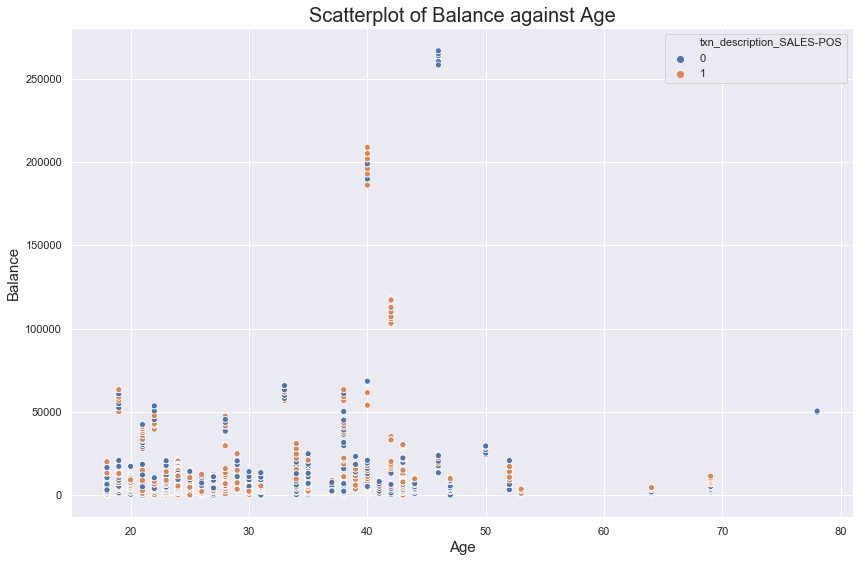

In [30]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(14,9)})
age_balance_with_transac_graph = sns.scatterplot(x = 'age', y = 'balance', data = customer_df, hue='txn_description_SALES-POS', legend="full")
age_balance_with_transac_graph.axes.set_title("Scatterplot of Balance against Age",fontsize=20)
age_balance_with_transac_graph.set_xlabel("Age", fontsize=15)
age_balance_with_transac_graph.set_ylabel("Balance", fontsize=15)

In [31]:
from plotly import __version__
import cufflinks as cf
cf.go_offline()
customer_df.iplot(kind = 'bar', x = 'month', y = 'amount', bins = 40, title='Barplot of Amount Spent against Months', xTitle='Months', yTitle='Amount Spent')

In [32]:
customer_df['age'].nunique()

33

In [33]:
customer_df = customer_df.drop(['account', 'first_name', 'customer_id'], axis = 1)

Standardizing to a single Scale for K-Nearest Neighbor

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customer_df.drop('month', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
scaled_features = scaler.transform(customer_df.drop('month', axis = 1))

In [36]:
df_feat = pd.DataFrame(scaled_features, columns = customer_df.columns[:-1])

In [37]:
X = df_feat
y = customer_df['month']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

K-Nearest Neighbor

In [40]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

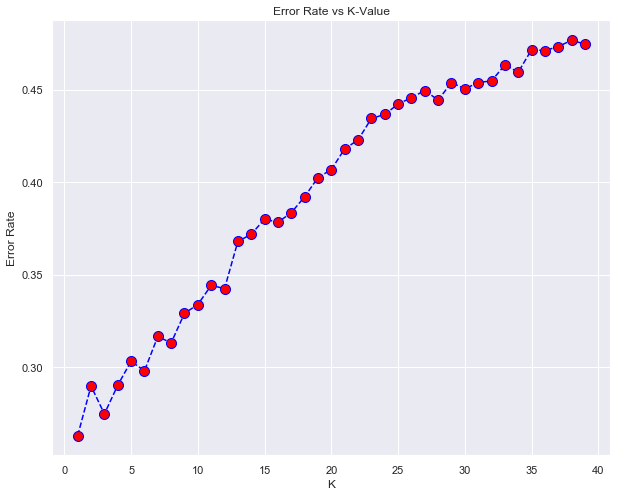

In [41]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize = (10,8))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [42]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_test,preds))
print('\n')
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

          10       0.75      0.78      0.77       763
           8       0.77      0.77      0.77       765
           9       0.68      0.66      0.67       788

    accuracy                           0.74      2316
   macro avg       0.74      0.74      0.74      2316
weighted avg       0.74      0.74      0.74      2316



[[593  47 123]
 [ 55 590 120]
 [139 125 524]]


In [45]:
# Print the R-squared value for the model
knn.score(X_train, y_train)

1.0

In [46]:
# RMSE
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, preds)))

0.6285520823346733


K-Nearest Neighbor Model Conclusion:
The K-Nearest Neighbor model achieved an R-squared value of 1.0. As the R-squared value is exactly 1, it indicates that the model classifies certain new datapoints that explains the variability of the amount spent in different months.

The model also achieved a Root Mean Squared Error (RMSE) of 0.628. It is the square root of the variance of the new datapoints that were created. The datapoints give the majority label of the number of neighbors we are considering and how far we are from the original data points. In general, the lower the RMSE, the better the model is.

Hence, this K-Nearest Neighbor model has performed pretty well in predicting the amount spent monthly of an ANZ customer.

Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

In [48]:
# Print the R-squared value for the model
dtree.score(X, y)

0.9495918102889724

In [49]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.5161468776512687


In [50]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

          10       0.82      0.83      0.83       763
           8       0.87      0.87      0.87       765
           9       0.81      0.79      0.80       788

    accuracy                           0.83      2316
   macro avg       0.83      0.83      0.83      2316
weighted avg       0.83      0.83      0.83      2316



[[637  34  92]
 [ 42 669  54]
 [ 98  69 621]]


Decision Tree Model Conclusion:
The Decision Tree model achieved an R-squared value of 0.950. As the R-squared value is closer to 1, it indicates that the model is able to explain of the variability of the amount spent in the months (8,9,10).

On the other hand, the model achieved a Root Mean Squared Error (RMSE) of 0.522. This is much lower than that of the K-Nearest Neighbor model.

Hence, although the Decision Tree model has performed better in some aspects than the K-Nearest Neighbor model, in terms of its precision, recall and f1-score, but it has a lower RMSE and R-square value.

In [51]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [52]:
feature = list(customer_df.columns[1:])
feature

['age',
 'amount',
 'month',
 'long',
 'lat',
 'gender_M',
 'txn_description_SALES-POS']

In [53]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, feature_names = feature, filled = True, rounded = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [55]:
# Print the R-squared value for the model
rfc.score(X, y)

0.9529609952053907

In [56]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, rfc_pred)))

0.49740257983334835


In [57]:
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

          10       0.83      0.84      0.84       763
           8       0.88      0.89      0.88       765
           9       0.82      0.80      0.81       788

    accuracy                           0.84      2316
   macro avg       0.84      0.84      0.84      2316
weighted avg       0.84      0.84      0.84      2316



[[643  37  83]
 [ 33 681  51]
 [100  59 629]]


Random Forest Model Conclusion:
The Random Forest model achieved an R-squared value of 0.953. As the R-squared value is closer to 1, it indicates that the model is better able to explain of the variability of the amount spent in the months (8,9,10) than the Decision Tree Model.

On the other hand, the model achieved a Root Mean Squared Error (RMSE) of 0.496. This is much lower than both of the previous models.

Hence, although the Random Forest model has performed better than the previous two models, in terms of precision, recall and f1-score, but it has a lower RMSE and R-squared value. This means that the average variance of the resulting model is reduced.

Hence, I do not recommend using none of the models to segment the customers without improving the model. Some room for improvement include adding more relevant variables or using a different type of machine learning model.